In [22]:
# !pip3 install pandas

In [23]:
# !pip install nlpaug --upgrade


In [57]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Conv1D, MaxPooling1D, Dropout
from keras.models import Model
import nlpaug
# import nlpaug.augmenter.text as nat
# import nlpaug.augmenter.text as nat
import nlpaug.augmenter.word.word_embs as nat
import random

import os
import glob
# cwd = os.path.abspath('../Dataset/')

# file_list = os.listdir('../Dataset')
# file_list

# csv_files = glob.glob('*.{}'.format('csv'))

# csv_files



df = pd.read_csv('deceptive-opinion.csv')
pd.set_option('display.max_colwidth', None)



# def augment_text_data(texts, n_aug=2):
#     augmented_texts = []
#     aug = nat.WordEmbsAug(model_type='glove', model_path='../../glove.6B.50d.txt')
#     for text in texts:
#         for i in range(n_aug):
#             augmented_texts.append(aug.augment(text))
#     return augmented_texts

# # Read in the original dataset
# # df = pd.read_csv('original_dataset.csv')

# # Get the text column from the dataset
# texts = df['text'].tolist()

# # Augment the text data
# augmented_texts = augment_text_data(texts, n_aug=1)

# # Shuffle the augmented texts
# augmented_texts = random.sample(augmented_texts, len(augmented_texts))

# # Add the augmented texts to the original dataset
# df['augmented_text'] = augmented_texts

# # Save the augmented dataset to a new file
# df.to_csv('augmented_dataset.csv', index=False)





In [58]:
# df = pd.read_csv('augmented_data.csv')
# df

In [59]:
# for i in df["augmented_text"]:
#     df["augmented_text"] = str(df["augmented_text"])[1:-1]


In [60]:
# df

In [61]:
# csv_files


In [62]:
# df_append = pd.DataFrame()
# #append all files together
# for file in csv_files:
#             df_temp = pd.read_csv(file)
#             df_append = df_append.append(df_temp, ignore_index=True)
# df_append

In [63]:
# df = df_append

In [64]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n"
1,truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n"
2,truthful,hyatt,positive,TripAdvisor,"This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a friend and her husband from out of town. This hotel is perfect, IMO. Easy check in and check out. Lovely, clean, comfortable rooms with great views of the city. I know this area pretty well and it's very convenient to many downtown Chicago attractions. We had dinner and went clubing with our friends around Division St.. We had no problems getting cabs back and forth to the Hyatt and there's even public transportation right near by but we didn't bother since we only needed cabs from and to the hotel. Parking, as is usual for Chicago, was expensive but we were able to get our car out quickly (however, we left on a Sunday morning, not exactly a high traffic time although it was a Bears homegame day, so a bit busier than usual I would think). No problems at all and the best part is that we got a rate of $100 through Hotwire, a downright steal for this area of Chicago and the quality of the hotel. \n"
3,truthful,omni,positive,TripAdvisor,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpful staff to the prized location on Michigan Avenue. While this address in Chicago requires a high level of quality, the Omni delivers. Check in for myself and a whole group of people with me was under 3 minutes, the staff had plentiful recommendations for dining and events, and the rooms are some of the largest you'll find at this price range in Chicago. Even the 'standard' room has a separate living area and work desk. The fitness center has free weights, weight machines, and two rows of cardio equipment. I shared the room with 7 others and did not feel cramped in any way! All in all, a great property! \n"
4,truthful,hyatt,positive,TripAdvisor,"I asked for a high floor away from the elevator and that is what I got. The room was pleasantly decorated, functional and very clean. I didn't need a whole lot of service but when I did they were pleasant and prompt. I used the fitness center which was well equipped and everything was in working order. It is in a great location at one end of the Michigan Avenue shopping district. \n"
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,"Problems started when I booked the InterContinental Chicago online at the hotel's site, and got a server error. Somehow I managed to get my reservation, and wish I had looked elsewhere on this great Chicago street, filled with plenty of other options. The server errors continued at check in and didn't let up. I was on a holiday weekend, but far too many others must have been pushy conventioneers, and I had trouble getting served. The hotel is enormous and doesn't give a sense of comfort. The health facilities are also just too big, so noisy and crowded. And Internet access was $18 a day, kind of surprising when I can go

In [65]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

<AxesSubplot:xlabel='deceptive', ylabel='count'>

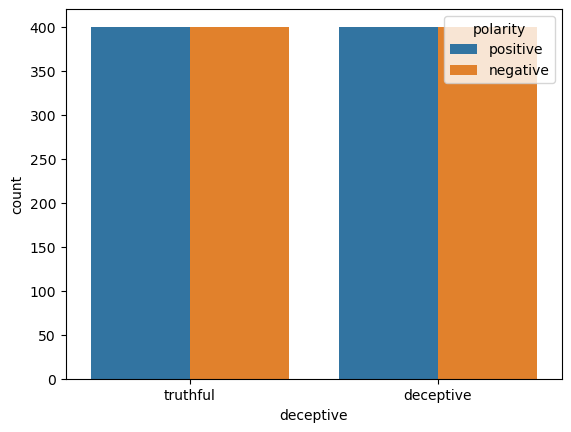

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'], hue='polarity', data = df)

In [67]:
df=df.drop(['hotel'],axis=1)


In [68]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string 
def text_cleaning(text):
    '''
        Make text lowercase, remove text in square brackets, remove link, remove special characters, 
        and remove words containing numbers.
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W'," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text


In [69]:
df['text']=df['text'].apply(text_cleaning)


In [70]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family on a thursday triple aaa rate of was a steal floor room complete with plasma tv bose stereo voss and evian water and gorgeous bathroom no tub but was fine for us concierge was very helpful you cannot beat this location only flaw was breakfast was pricey and service was very very slow for four kids and four adults on a friday morning even though there were only two other tables in the restaurant food was very good so it was worth the wait i would return in a heartbeat a gem in chicago
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was less than which also included breakfast vouchers had a great view of river lake wrigley bldg tribune bldg most major restaurants shopping sightseeing attractions within walking distance large room with a very comfortable bed
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catching up on my reviews from the past several months a dear friend and i stayed at the hyatt regency in late october for one night while visiting a friend and her husband from out of town this hotel is perfect imo easy check in and check out lovely clean comfortable rooms with great views of the city i know this area pretty well and it s very convenient to many downtown chicago attractions we had dinner and went clubing with our friends around division st we had no problems getting cabs back and forth to the hyatt and there s even public transportation right near by but we didn t bother since we only needed cabs from and to the hotel parking as is usual for chicago was expensive but we were able to get our car out quickly however we left on a sunday morning not exactly a high traffic time although it was a bears homegame day so a bit busier than usual i would think no problems at all and the best part is that we got a rate of through hotwire a downright steal for this area of chicago and the quality of the hotel
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts from the spaciousness of the rooms to the helpful staff to the prized location on michigan avenue while this address in chicago requires a high level of quality the omni delivers check in for myself and a whole group of people with me was under minutes the staff had plentiful recommendations for dining and events and the rooms are some of the largest you ll find at this price range in chicago even the standard room has a separate living area and work desk the fitness center has free weights weight machines and two rows of cardio equipment i shared the room with others and did not feel cramped in any way all in all a great property
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevator and that is what i got the room was pleasantly decorated functional and very clean i didn t need a whole lot of service but when i did they were pleasant and prompt i used the fitness center which was well equipped and everything was in working order it is in a great location at one end of the michigan avenue shopping district
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontinental chicago online at the hotel s site and got a server error somehow i managed to get my reservation and wish i had looked elsewhere on this great chicago street filled with plenty of other options the server errors continued at check in and didn t let up i was on a holiday weekend but far too many others must have been pushy conventioneers and i had trouble getting served the hotel is enormous and doesn t give a sense of comfort the health facilities are also just too big so noisy and crowded and internet access was a day kind of surprising when i can go around the corner to a starbucks next time i ll pick a more intimate place nearby without so many server errors
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and interior decorating but

In [71]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/deth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['result_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [73]:
df.head()

,deceptive,polarity,source,text,result_without_stopwords
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family on a thursday triple aaa rate of was a steal floor room complete with plasma tv bose stereo voss and evian water and gorgeous bathroom no tub but was fine for us concierge was very helpful you cannot beat this location only flaw was breakfast was pricey and service was very very slow for four kids and four adults on a friday morning even though there were only two other tables in the restaurant food was very good so it was worth the wait i would return in a heartbeat a gem in chicago,stayed one night getaway family thursday triple aaa rate steal floor room complete plasma tv bose stereo voss evian water gorgeous bathroom tub fine us concierge helpful cannot beat location flaw breakfast pricey service slow four kids four adults friday morning even though two tables restaurant food good worth wait would return heartbeat gem chicago
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was less than which also included breakfast vouchers had a great view of river lake wrigley bldg tribune bldg most major restaurants shopping sightseeing attractions within walking distance large room with a very comfortable bed,triple rate upgrade view room less also included breakfast vouchers great view river lake wrigley bldg tribune bldg major restaurants shopping sightseeing attractions within walking distance large room comfortable bed
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catching up on my reviews from the past several months a dear friend and i stayed at the hyatt regency in late october for one night while visiting a friend and her husband from out of town this hotel is perfect imo easy check in and check out lovely clean comfortable rooms with great views of the city i know this area pretty well and it s very convenient to many downtown chicago attractions we had dinner and went clubing with our friends around division st we had no problems getting cabs back and forth to the hyatt and there s even public transportation right near by but we didn t bother since we only needed cabs from and to the hotel parking as is usual for chicago was expensive but we were able to get our car out quickly however we left on a sunday morning not exactly a high traffic time although it was a bears homegame day so a bit busier than usual i would think no problems at all and the best part is that we got a rate of through hotwire a downright steal for this area of chicago and the quality of the hotel,comes little late finally catching reviews past several months dear friend stayed hyatt regency late october one night visiting friend husband town hotel perfect imo easy check check lovely clean comfortable rooms great views city know area pretty well convenient many downtown chicago attractions dinner went clubing friends around division st problems getting cabs back forth hyatt even public transportation right near bother since needed cabs hotel parking usual chicago expensive able get car quickly however left sunday morning exactly high traffic time although bears homegame day bit busier usual would think problems best part got rate hotwire downright steal area chicago quality hotel
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts from the spaciousness of the rooms to the helpful staff to the prized location on michigan avenue while this address in chicago requires a high level of quality the omni delivers check in for myself and a whole group of people with me was under minutes the staff had plentiful recommendations for dining and events and the rooms are some of the largest you ll find at this price range in chicago even the standard room has a separate living area and work desk the fitness center has free weights weight machines and two rows of cardio equipment i shared the room with others and did not feel cramped in any way all in all a gre

In [74]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/deth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
from textblob import TextBlob

def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

In [76]:
os = df.result_without_stopwords.apply(pos)
os1 = pd.DataFrame(os)

In [77]:
os1.head()

,result_without_stopwords
0,"[(stayed, JJ), (one, CD), (night, NN), (getaway, NN), (family, NN), (thursday, JJ), (triple, JJ), (aaa, NN), (rate, NN), (steal, JJ), (floor, NN), (room, NN), (complete, JJ), (plasma, JJ), (tv, NN), (bose, NN), (stereo, NN), (voss, NN), (evian, JJ), (water, NN), (gorgeous, JJ), (bathroom, NN), (tub, NN), (fine, VBP), (us, PRP), (concierge, VBP), (helpful, JJ), (can, MD), (not, RB), (beat, VB), (location, NN), (flaw, NN), (breakfast, NN), (pricey, JJ), (service, NN), (slow, VB), (four, CD), (kids, NNS), (four, CD), (adults, NNS), (friday, JJ), (morning, NN), (even, RB), (though, IN), (two, CD), (tables, NNS), (restaurant, JJ), (food, NN), (good, JJ), (worth, NN), (wait, NN), (would, MD), (return, VB), (heartbeat, NN), (gem, NN), (chicago, NN)]"
1,"[(triple, JJ), (rate, NN), (upgrade, JJ), (view, NN), (room, NN), (less, NN), (also, RB), (included, VBD), (breakfast, NN), (vouchers, NNS), (great, JJ), (view, NN), (river, NN), (lake, VBP), (wrigley, NN), (bldg, NN), (tribune, NN), (bldg, NN), (major, JJ), (restaurants, NNS), (shopping, VBG), (sightseeing, VBG), (attractions, NNS), (within, IN), (walking, VBG), (distance, NN), (large, JJ), (room, NN), (comfortable, JJ), (bed, NN)]"
2,"[(comes, VBZ), (little, RB), (late, JJ), (finally, RB), (catching, VBG), (reviews, NNS), (past, IN), (several, JJ), (months, NNS), (dear, VBP), (friend, VBP), (stayed, VBN), (hyatt, JJ), (regency, NN), (late, JJ), (october, NN), (one, CD), (night, NN), (visiting, VBG), (friend, JJ), (husband, NN), (town, NN), (hotel, NN), (perfect, JJ), (imo, JJ), (easy, JJ), (check, NN), (check, NN), (lovely, JJ), (clean, JJ), (comfortable, JJ), (rooms, NNS), (great, JJ), (views, NNS), (city, NN), (know, VBP), (area, NN), (pretty, RB), (well, RB), (convenient, JJ), (many, JJ), (downtown, NN), (chicago, JJ), (attractions, NNS), (dinner, VBP), (went, VBD), (clubing, VBG), (friends, NNS), (around, IN), (division, NN), (st, NN), (problems, NNS), (getting, VBG), (cabs, NNS), (back, RB), (forth, VBP), (hyatt, NNS), (even, RB), (public, JJ), (transportation, NN), (right, RB), (near, IN), (bother, NN), (since, IN), (needed, VBN), (cabs, NN), (hotel, NN), (parking, VBG), (usual, JJ), (chicago, RB), (expensive, JJ), (able, JJ), (get, NN), (car, NN), (quickly, RB), (however, RB), (left, VBN), (sunday, JJ), (morning, NN), (exactly, RB), (high, JJ), (traffic, NN), (time, NN), (although, IN), (bears, NNS), (homegame, JJ), (day, NN), (bit, NN), (busier, JJ), (usual, JJ), (would, MD), (think, VB), (problems, NNS), (best, JJS), (part, NN), (got, VBD), (rate, NN), (hotwire, NN), (downright, NN), (steal, JJ), ...]"
3,"[(omni, NNS), (chicago, VBP), (really, RB), (delivers, NNS), (fronts, NNS), (spaciousness, NN), (rooms, NNS), (helpful, JJ), (staff, NN), (prized, VBN), (location, NN), (michigan, FW), (avenue, NN), (address, NN), (chicago, NN), (requires, VBZ), (high, JJ), (level, NN), (quality, NN), (omni, VBP), (delivers, NNS), (check, VBP), (whole, JJ), (group, NN), (people, NNS), (minutes, NNS), (staff, NN), (plentiful, JJ), (recommendations, NNS), (dining, VBG), (events, NNS), (rooms, NNS), (largest, JJS), (find, VBP), (price, NN), (range, NN), (chicago, VBD), (even, RB), (standard, JJ), (room, NN), (separate, JJ), (living, NN), (area, NN), (work, NN), (desk, NN), (fitness, NN), (center, NN), (free, JJ), (weights, NNS), (weight, VBN), (machines, NNS), (two, CD), (rows, NNS), (cardio, VBP), (equipment, NN), (shared, VBN), (room, NN), (others, NNS), (feel, VBP), (cramped, JJ), (way, NN), (great, JJ), (property, NN)]"
4,"[(asked, VBN), (high, JJ), (floor, NN), (away, RB), (elevator, JJ), (got, VBD), (room, NN), (pleasantly, RB), (decorated, VBN), (functional, JJ), (clean, JJ), (need, VBP), (whole, JJ), (lot, NN), (service, NN), (pleasant, JJ), (prompt, NN), (used, VBN), (fitness, NN), (center, NN), (well, RB), (equipped, VBD), (everything, NN), (working, VBG), (order, NN), (great, JJ), (location, NN), (one, CD), (end, NN), (michigan, NN), (avenue, VBP), (sho

In [78]:
os1['pos'] = os1['result_without_stopwords'].map(lambda x: " ".join(["".join(x) for x in x]))


In [79]:
os1

,result_without_stopwords,pos
0,"[(stayed, JJ), (one, CD), (night, NN), (getaway, NN), (family, NN), (thursday, JJ), (triple, JJ), (aaa, NN), (rate, NN), (steal, JJ), (floor, NN), (room, NN), (complete, JJ), (plasma, JJ), (tv, NN), (bose, NN), (stereo, NN), (voss, NN), (evian, JJ), (water, NN), (gorgeous, JJ), (bathroom, NN), (tub, NN), (fine, VBP), (us, PRP), (concierge, VBP), (helpful, JJ), (can, MD), (not, RB), (beat, VB), (location, NN), (flaw, NN), (breakfast, NN), (pricey, JJ), (service, NN), (slow, VB), (four, CD), (kids, NNS), (four, CD), (adults, NNS), (friday, JJ), (morning, NN), (even, RB), (though, IN), (two, CD), (tables, NNS), (restaurant, JJ), (food, NN), (good, JJ), (worth, NN), (wait, NN), (would, MD), (return, VB), (heartbeat, NN), (gem, NN), (chicago, NN)]",stayedJJ oneCD nightNN getawayNN familyNN thursdayJJ tripleJJ aaaNN rateNN stealJJ floorNN roomNN completeJJ plasmaJJ tvNN boseNN stereoNN vossNN evianJJ waterNN gorgeousJJ bathroomNN tubNN fineVBP usPRP conciergeVBP helpfulJJ canMD notRB beatVB locationNN flawNN breakfastNN priceyJJ serviceNN slowVB fourCD kidsNNS fourCD adultsNNS fridayJJ morningNN evenRB thoughIN twoCD tablesNNS restaurantJJ foodNN goodJJ worthNN waitNN wouldMD returnVB heartbeatNN gemNN chicagoNN
1,"[(triple, JJ), (rate, NN), (upgrade, JJ), (view, NN), (room, NN), (less, NN), (also, RB), (included, VBD), (breakfast, NN), (vouchers, NNS), (great, JJ), (view, NN), (river, NN), (lake, VBP), (wrigley, NN), (bldg, NN), (tribune, NN), (bldg, NN), (major, JJ), (restaurants, NNS), (shopping, VBG), (sightseeing, VBG), (attractions, NNS), (within, IN), (walking, VBG), (distance, NN), (large, JJ), (room, NN), (comfortable, JJ), (bed, NN)]",tripleJJ rateNN upgradeJJ viewNN roomNN lessNN alsoRB includedVBD breakfastNN vouchersNNS greatJJ viewNN riverNN lakeVBP wrigleyNN bldgNN tribuneNN bldgNN majorJJ restaurantsNNS shoppingVBG sightseeingVBG attractionsNNS withinIN walkingVBG distanceNN largeJJ roomNN comfortableJJ bedNN
2,"[(comes, VBZ), (little, RB), (late, JJ), (finally, RB), (catching, VBG), (reviews, NNS), (past, IN), (several, JJ), (months, NNS), (dear, VBP), (friend, VBP), (stayed, VBN), (hyatt, JJ), (regency, NN), (late, JJ), (october, NN), (one, CD), (night, NN), (visiting, VBG), (friend, JJ), (husband, NN), (town, NN), (hotel, NN), (perfect, JJ), (imo, JJ), (easy, JJ), (check, NN), (check, NN), (lovely, JJ), (clean, JJ), (comfortable, JJ), (rooms, NNS), (great, JJ), (views, NNS), (city, NN), (know, VBP), (area, NN), (pretty, RB), (well, RB), (convenient, JJ), (many, JJ), (downtown, NN), (chicago, JJ), (attractions, NNS), (dinner, VBP), (went, VBD), (clubing, VBG), (friends, NNS), (around, IN), (division, NN), (st, NN), (problems, NNS), (getting, VBG), (cabs, NNS), (back, RB), (forth, VBP), (hyatt, NNS), (even, RB), (public, JJ), (transportation, NN), (right, RB), (near, IN), (bother, NN), (since, IN), (needed, VBN), (cabs, NN), (hotel, NN), (parking, VBG), (usual, JJ), (chicago, RB), (expensive, JJ), (able, JJ), (get, NN), (car, NN), (quickly, RB), (however, RB), (left, VBN), (sunday, JJ), (morning, NN), (exactly, RB), (high, JJ), (traffic, NN), (time, NN), (although, IN), (bears, NNS), (homegame, JJ), (day, NN), (bit, NN), (busier, JJ), (usual, JJ), (would, MD), (think, VB), (problems, NNS), (best, JJS), (part, NN), (got, VBD), (rate, NN), (hotwire, NN), (downright, NN), (steal, JJ), ...]",comesVBZ littleRB lateJJ finallyRB catchingVBG reviewsNNS pastIN severalJJ monthsNNS dearVBP friendVBP stayedVBN hyattJJ regencyNN lateJJ octoberNN oneCD nightNN visitingVBG friendJJ husbandNN townNN hotelNN perfectJJ imoJJ easyJJ checkNN checkNN lovelyJJ cleanJJ comfortableJJ roomsNNS greatJJ viewsNNS cityNN knowVBP areaNN prettyRB wellRB convenientJJ manyJJ downtownNN chicagoJJ attractionsNNS dinnerVBP wentVBD clubingVBG friendsNNS aroundIN divisionNN stNN problemsNNS gettingVBG cabsNNS backRB forthVBP hyattNNS evenRB publicJJ transportationNN rightRB nearIN botherNN sinceIN neededVBN cabsNN hotelN

In [80]:
df = df = pd.merge(df, os1, right_index=True, left_index=True)
df

,deceptive,polarity,source,text,result_without_stopwords_x,result_without_stopwords_y,pos
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family on a thursday triple aaa rate of was a steal floor room complete with plasma tv bose stereo voss and evian water and gorgeous bathroom no tub but was fine for us concierge was very helpful you cannot beat this location only flaw was breakfast was pricey and service was very very slow for four kids and four adults on a friday morning even though there were only two other tables in the restaurant food was very good so it was worth the wait i would return in a heartbeat a gem in chicago,stayed one night getaway family thursday triple aaa rate steal floor room complete plasma tv bose stereo voss evian water gorgeous bathroom tub fine us concierge helpful cannot beat location flaw breakfast pricey service slow four kids four adults friday morning even though two tables restaurant food good worth wait would return heartbeat gem chicago,"[(stayed, JJ), (one, CD), (night, NN), (getaway, NN), (family, NN), (thursday, JJ), (triple, JJ), (aaa, NN), (rate, NN), (steal, JJ), (floor, NN), (room, NN), (complete, JJ), (plasma, JJ), (tv, NN), (bose, NN), (stereo, NN), (voss, NN), (evian, JJ), (water, NN), (gorgeous, JJ), (bathroom, NN), (tub, NN), (fine, VBP), (us, PRP), (concierge, VBP), (helpful, JJ), (can, MD), (not, RB), (beat, VB), (location, NN), (flaw, NN), (breakfast, NN), (pricey, JJ), (service, NN), (slow, VB), (four, CD), (kids, NNS), (four, CD), (adults, NNS), (friday, JJ), (morning, NN), (even, RB), (though, IN), (two, CD), (tables, NNS), (restaurant, JJ), (food, NN), (good, JJ), (worth, NN), (wait, NN), (would, MD), (return, VB), (heartbeat, NN), (gem, NN), (chicago, NN)]",stayedJJ oneCD nightNN getawayNN familyNN thursdayJJ tripleJJ aaaNN rateNN stealJJ floorNN roomNN completeJJ plasmaJJ tvNN boseNN stereoNN vossNN evianJJ waterNN gorgeousJJ bathroomNN tubNN fineVBP usPRP conciergeVBP helpfulJJ canMD notRB beatVB locationNN flawNN breakfastNN priceyJJ serviceNN slowVB fourCD kidsNNS fourCD adultsNNS fridayJJ morningNN evenRB thoughIN twoCD tablesNNS restaurantJJ foodNN goodJJ worthNN waitNN wouldMD returnVB heartbeatNN gemNN chicagoNN
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was less than which also included breakfast vouchers had a great view of river lake wrigley bldg tribune bldg most major restaurants shopping sightseeing attractions within walking distance large room with a very comfortable bed,triple rate upgrade view room less also included breakfast vouchers great view river lake wrigley bldg tribune bldg major restaurants shopping sightseeing attractions within walking distance large room comfortable bed,"[(triple, JJ), (rate, NN), (upgrade, JJ), (view, NN), (room, NN), (less, NN), (also, RB), (included, VBD), (breakfast, NN), (vouchers, NNS), (great, JJ), (view, NN), (river, NN), (lake, VBP), (wrigley, NN), (bldg, NN), (tribune, NN), (bldg, NN), (major, JJ), (restaurants, NNS), (shopping, VBG), (sightseeing, VBG), (attractions, NNS), (within, IN), (walking, VBG), (distance, NN), (large, JJ), (room, NN), (comfortable, JJ), (bed, NN)]",tripleJJ rateNN upgradeJJ viewNN roomNN lessNN alsoRB includedVBD breakfastNN vouchersNNS greatJJ viewNN riverNN lakeVBP wrigleyNN bldgNN tribuneNN bldgNN majorJJ restaurantsNNS shoppingVBG sightseeingVBG attractionsNNS withinIN walkingVBG distanceNN largeJJ roomNN comfortableJJ bedNN
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catching up on my reviews from the past several months a dear friend and i stayed at the hyatt regency in late october for one night while visiting a friend and her husband from out of town this hotel is perfect imo easy check in and check out lovely clean comfortable rooms with great views of the city i know this area pretty well and it s very convenient to many downtown chicago attractions we had dinner and went clubing with our friends arou

In [81]:
sentences=df['text'].values
y=df['deceptive'].values


In [82]:
y

array(['truthful', 'truthful', 'truthful', ..., 'deceptive', 'deceptive',
       'deceptive'], dtype=object)

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

In [84]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [85]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# sentences = vectorizer.fit_transform(sentences)

In [86]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y, test_size=0.2, random_state=1000)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.texts_to_sequences(sentences_train)
x_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

x_train = pad_sequences(x_train, padding = 'post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)


In [87]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, MaxPooling1D
from keras.layers import Dropout, Flatten, Bidirectional, Dense, Activation, TimeDistributed


# embedding_dim = 100

# cnn_model = Sequential()

# cnn_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))


# Original Params : filters = 128, LSTM=250, and add all regularizer back


from tensorflow.keras.callbacks import EarlyStopping
reg = tf.keras.regularizers.l1(0.002)
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# cnn_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
# cnn_model.add(MaxPooling1D(pool_size=3))

# cnn_model.add(LSTM(200))

# cnn_model.add(layers.Dropout(rate = 0.4))
# cnn_model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=reg))


embedding_layer = Embedding(20000, 128, input_length=100)
cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0012))
# cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu')

pooling_layer = MaxPooling1D(pool_size=3)
lstm_layer = LSTM(500)
bi_lstm = Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.2))
dropout_layer = Dropout(0.5)
output_layer = Dense(1, activation='sigmoid', kernel_regularizer=reg)
# output_layer = Dense(1, activation='sigmoid')



input_ = Input(shape=(100,))
x = embedding_layer(input_)
x = cnn_layer(x)
x = dropout_layer(x)
x = pooling_layer(x)
x = dropout_layer(x)
x = cnn_layer(x)
x = dropout_layer(x)
x = pooling_layer(x)
x = dropout_layer(x)
# x = cnn_layer(x)
# x = dropout_layer(x)
# x = pooling_layer(x)
# x = dropout_layer(x)

x = bi_lstm(x)
x = dropout_layer(x)
output = output_layer(x)



cnn_model = Model(input_, output)


cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_c = cnn_model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    batch_size=32,callbacks=[early_stop])
score = cnn_model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


# history_c = cnn_model.fit(x_train, y_train,
#                     epochs=100,
#                     validation_data=(x_test, y_test),
#                     batch_size=10)

Epoch 1/20
40/40 [==============================] - 8s 127ms/step - loss: 0.8913 - accuracy: 0.5055 - val_loss: 0.8614 - val_accuracy: 0.4906
Epoch 2/20
40/40 [==============================] - 5s 119ms/step - loss: 0.8386 - accuracy: 0.5203 - val_loss: 0.8205 - val_accuracy: 0.4906
Epoch 3/20
40/40 [==============================] - 5s 119ms/step - loss: 0.7803 - accuracy: 0.5852 - val_loss: 0.7466 - val_accuracy: 0.6406
Epoch 4/20
40/40 [==============================] - 5s 122ms/step - loss: 0.5773 - accuracy: 0.7633 - val_loss: 0.5550 - val_accuracy: 0.7937
Epoch 5/20
40/40 [==============================] - 5s 119ms/step - loss: 0.2831 - accuracy: 0.9281 - val_loss: 0.5393 - val_accuracy: 0.7906
Epoch 6/20
40/40 [==============================] - 5s 124ms/step - loss: 0.1759 - accuracy: 0.9758 - val_loss: 0.5818 - val_accuracy: 0.7750
Epoch 7/20
40/40 [==============================] - 5s 124ms/step - loss: 0.1566 - accuracy: 0.9758 - val_loss: 0.6129 - val_accuracy: 0.8281
Epoch 

In [88]:
from sklearn.model_selection import KFold
import numpy as np

k = 5
kf = KFold(n_splits=k)
scores = []

for train_index, test_index in kf.split(sentences):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
    cnn_model.fit(x_train, y_train, epochs=5)
    scores.append(cnn_model.evaluate(x_test, y_test))

print("Avg. cross-val accuracy:", np.mean(scores))


Epoch 1/5
40/40 [==============================] - 5s 119ms/step - loss: 0.0569 - accuracy: 0.9992
Epoch 2/5
40/40 [==============================] - 5s 118ms/step - loss: 0.0525 - accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 5s 114ms/step - loss: 0.0521 - accuracy: 0.9992
Epoch 4/5
40/40 [==============================] - 5s 114ms/step - loss: 0.0484 - accuracy: 0.9992
Epoch 5/5
10/10 [==============================] - 0s 22ms/step - loss: 0.6977 - accuracy: 0.7750
Epoch 1/5
40/40 [==============================] - 5s 116ms/step - loss: 0.0497 - accuracy: 0.9961
Epoch 2/5
40/40 [==============================] - 5s 116ms/step - loss: 0.0605 - accuracy: 0.9937
Epoch 3/5
40/40 [==============================] - 5s 128ms/step - loss: 0.0444 - accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 5s 129ms/step - loss: 0.0428 - accuracy: 0.9992
Epoch 5/5
10/10 [==============================] - 0s 23ms/step - loss: 0.6933 - accuracy: 0.7844
Epoch 1/5
40

In [89]:
import pickle
pickle.dump(cnn_model, open('model2.pkl', 'wb'))
# cnn_model.save('model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......conv1d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......input_layer
.........vars
......max_pooling1d
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.

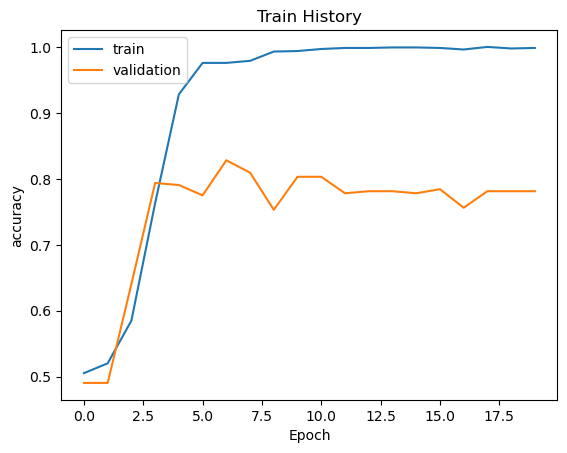

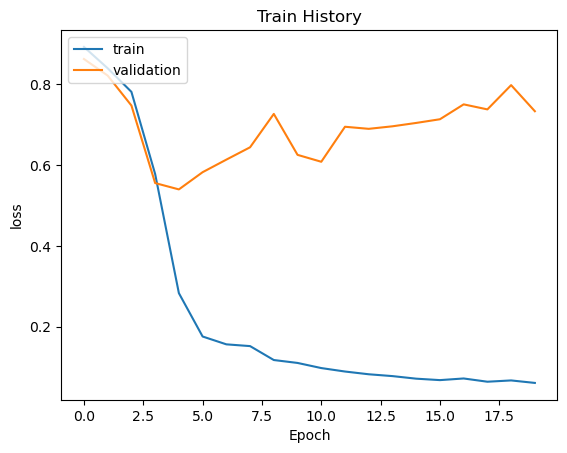

In [90]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(history_c,'accuracy','val_accuracy')
show_train_history(history_c,'loss','val_loss')

In [91]:
print('Training loss \t', history_c.history['loss'][-1]*100)
print('Training accuracy ',  history_c.history['accuracy'][-1]*100)
print('Validation loss ', history_c.history['val_loss'][-1]*100)
print('Validation accuracy ',  history_c.history['val_accuracy'][-1]*100)

Training loss 	 6.125832349061966
Training accuracy  99.84375238418579
Validation loss  73.24531674385071
Validation accuracy  78.125


In [92]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# embedding_dim = 100
# reg = tf.keras.regularizers.l1(0.11)

# # Define the model architecture
# def create_model(num_filters, kernel_size, pool_size, lstm_units):
#     model = Sequential()
#     model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))

#     model.add(Conv1D(filters=num_filters, kernel_size= kernel_size, padding='same', activation='relu'))

#     model.add(MaxPooling1D(pool_size=pool_size))
# #     model.add(Conv1D(num_filters, kernel_size, activation='relu'))
# #     model.add(MaxPooling1D(pool_size=pool_size))
#     model.add(LSTM(lstm_units, activation='relu'))
#     model.add(layers.Dropout(rate = 0.4))

# #     model.add(Flatten())
# #     model.add(LSTM(lstm_units, activation='relu'))
#     cnn_model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=reg))

# #     model.add(Dense(num_classes, activation='softmax'))
#     cnn_model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])    
    
#     return model

# # Wrap the model in a KerasClassifier
# model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define the hyperparameter search space
# param_grid = dict(num_filters=[32, 64, 128],
#                   kernel_size=[3, 5, 7],
#                   pool_size=[2, 4, 8],
#                   lstm_units=[64, 128, 256])

# # Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# grid_result = grid.fit(x_train, y_train)

# # Print the best hyperparameters
# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [93]:
# grid_result.best_params_

In [94]:
new_text = "I love this hotel. The staff is very friendly. I don't think there is any places as good as this"
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = cnn_model.predict(new_data)
prediction_label = np.round(prediction[0][0])

1/1 [==============================] - 0s 329ms/step


In [95]:
print("truthful" if prediction_label==1 else "deceptive")

deceptive


In [96]:
new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = cnn_model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 21ms/step
deceptive


In [97]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = cnn_model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 21ms/step
truthful


In [98]:
new_text = "I had to do a little research on the Hilton brand because it's not one that I was familiar with. I wanted to know what this hotel chain's reputation was, so I did a little research online and found out that it's pretty well-known as a chain that people book into for their business trips and vacations. I also found out that this hotel chain is pretty well-reviewed by people who have stayed in their hotels."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = cnn_model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 21ms/step
deceptive


In [99]:
# prediction = cnn_model.predict(y_test)
# prediction_label = np.round(prediction[0][0])
# print(prediction_label)

In [100]:
y_pred = np.round(cnn_model.predict(x_test).ravel())

10/10 [==============================] - 0s 20ms/step


In [101]:
# y_pred

In [102]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.78      0.76       157
           1       0.77      0.73      0.75       163

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [103]:
y_pred_label = []
for i in y_pred:
    if i == 1:
        y_pred_label.append("truthful")
    else:
        y_pred_label.append("deceptive")


# y_pred_label

In [104]:
y_test_label = []
for i in y_test:
    if i == 1:
        y_test_label.append("truthful")
    else:
        y_test_label.append("deceptive")


# y_test_label

In [105]:
def num_decep_truth(pred):
    num_deceptive = 0
    num_truthful = 0

    for i in pred:
        if i == 'deceptive':
            num_deceptive+=1
        elif i == 'truthful':
            num_truthful+=1
    return {"num_deceptive":num_deceptive,"num_truthful":num_truthful}

In [106]:
predict_test = pd.DataFrame({'Test':sentences_test, 'Pred':y_pred_label, 'True_label':y_test_label}, columns=['Test','Pred','True_label'])
predict_test

,Test,Pred,True_label
0,after some deliberation i booked the sofitel water tower place for a night stop over in june this was my first visit to chicago and it turned out that we had a really great time we loved our rooms which were just the basic type on the lower floors but they were very well appointed the decor is modern and personally i liked it a lot the rooms were pleasant and airy and the bed extremely comfortable the hotel location is just perfect close to the shops on michagan avenue and the beach at oak street lovely restaurants close by and nightlife in rush street is just steps away the area although bustling was peaceful and quiet we could walk to most places and i would not hesitate to stay here again the hotel staff very helpful always smiling and ready to help from the doormen to the helpful lady at conceriage i would not hesitate at all to stay at sofitel water tower place next time i m in chicago in fact i look forward to my next visit,truthful,truthful
1,i was very disappointed with this hotel the front desk clerk was rude she was on a personal call and took mins to get off the phone when i arrived in the room the bed wasn t made from the last guest and all the towels were dirty i called down to the front desk and she made me come back down from the twelveth floor for a new room assignment on the twelveth floor once downstairs the clerk treated me as though i had done something wrong when i arrived in the new room i found the bathroom less than clean there was hair all over the floor toilet and shower the shower curtain was mildewed and dried toothpaste spit on the mirror my allergies started to bother me immediately upon entering the room so i checked the filter in the air conditioner which looked like it had never been cleaned the comforter was stained and the carpet looked like it never saw a vacuum while waiting on acceptable room i went to dinner which proved to be as bad as the rooms the lettuce in my salad was brown and slimmy the steak was rare and i asked for medium not to mention it tasted like rotten meat the veggies looked like they had been cooked a week earlier and the potato was shriveled and dry to top the whole experience off when i went to turn on the lamp in my final room it electrocuted and the ambulance had to come get me for a day hospital stay,deceptive,deceptive
2,i choose the homewood suites in downtown chicago because i called them directly in search of a two bed room within walking distances of the attractions of chicago well when we arrived it was apparent that there was chaos do to one of two elevators being out of service which it had been since tuesday this was saturday once we finally got to the floor to check in i figured our relaxing time had begun well we got our room key and headed for floor again waited for an elevator but finally made it two our room i put the key in the door it opened to the surprise of me and the family already inside the room yup we got double booked the family was very nice and seemed ok with their surprise visitors said our apologies and went back to the elevator and waited again to head back down to the floor registration to figure the mess out we have now been at the hotel for a half hour with no room and slightly annoyed made it to the reservation desk and explained the situation i did get an apology and a new room new key in hand waited again for an elevator to bring us to the floor for a new room finally got to our room only to find it was a king suite we are a family of four including two full grown teenage boys there was no way they were going to fit on a pull out sofa so really annoyed now i called the front desk and was told that were no rooms with two beds left even though i had specifically asked for two beds when i booked it said two beds on preference on my reservation but the reservation agent assured me two beds would be available when i checked in she went so far to but two beds on my reservation paper work the operator said there ar

In [107]:
# def test_string(s):
# #     X_test_tf = tf_vect.transform([s])
#     y_predict = cnn_model.predict(X_test_tf)
#     return y_predict

In [108]:
# test_string("The hotel was good.The room had a 27-inch Samsung led tv, a microwave.The room had a double bed")


In [109]:
def num_decep_truth(pred):
    num_deceptive = 0
    num_truthful = 0

    for i in pred:
        if i == 'deceptive':
            num_deceptive+=1
        elif i == 'truthful':
            num_truthful+=1
    return {"num_deceptive":num_deceptive,"num_truthful":num_truthful}

In [110]:
num_decep_truth(y_pred_label)

{'num_deceptive': 166, 'num_truthful': 154}

In [111]:
pkl = open('model2.pkl', 'rb')
clf = pickle.load(pkl) 

new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
print(new_data)
prediction = clf.predict(new_data)
print(prediction)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")

# X_test_tf = tf_vect.transform(review_test)
# pred = clf.predict(X_test_tf)
# pred

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-16 19:52:18         4156
metadata.json                                  2023-02-16 19:52:18           64
variables.h5                                   2023-02-16 19:52:18     43721536
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......conv1d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......input_laye

In [112]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

[[10, 982, 3, 29, 11, 170, 22, 5, 240, 151, 4, 158, 20, 8, 102, 9, 1, 315, 801, 11, 5, 186, 35, 89, 35, 1, 157, 128, 58, 5, 596, 7315, 159, 1063, 51, 11, 1, 92, 3, 110, 1268, 1703, 778, 89, 27, 29, 71, 54, 2, 10, 750, 2, 1812, 1689, 3, 5, 415, 8, 11, 27, 219, 170, 1, 12, 6, 321, 37, 10, 893, 1, 3834, 1, 433, 23, 1220, 2, 30, 6, 5, 1917, 9, 1846, 2, 2202, 17, 1381, 51, 907, 945, 20, 16, 5, 186, 8, 203, 1, 45, 2678, 341, 2, 422, 5, 317, 302, 1629, 23, 77, 321, 2, 643, 115, 122, 1283, 1349, 7, 1, 12, 6, 1325, 1089, 25, 344, 82, 1629, 22, 27, 75, 54, 13, 107, 11, 5, 450, 29, 56, 31, 60, 3, 542, 11, 157, 26, 32, 157, 1912, 2, 291, 22, 1257, 170, 2, 558, 3, 542, 1, 41, 124, 24, 111, 3, 339, 4, 676, 87, 608, 181, 20, 90, 4075, 25, 10, 144, 1, 779, 52, 122, 91, 638, 2, 228, 60, 10, 23, 15, 5, 3121, 1, 75, 293, 20, 8, 101, 111, 188, 11, 13, 16, 68, 25, 30, 45, 100, 665, 7, 20, 123, 10, 1689, 3, 1, 310, 2, 21, 5, 41, 94, 4, 34, 286, 3, 29, 71, 63, 1539, 70, 1, 239, 197, 1163, 334, 27, 94]]
[[ 45